# Bias-Variance Trade-Off

The bias-variance trade-off is a key concept in machine learning that helps us understand the performance of models. It addresses the balance between making the model complex enough to capture patterns but not so complex that it overfits the training data.

### **Bias**
Bias refers to errors due to overly simplistic models that fail to capture the underlying patterns of the data.
- **Example**: A simple linear regression model on data that actually has a polynomial relationship. The model's predictions will be consistently off in a certain direction.
- **High Bias**: Leads to **underfitting**. The model is too simple and doesn't capture the data well.

### **Variance**
Variance refers to errors due to overly complex models that capture the noise in the training data.
- **Example**: A high-degree polynomial model that fits the training data perfectly, including the noise, but performs poorly on new data.
- **High Variance**: Leads to **overfitting**. The model is too complex and captures noise as if it were a pattern.

### **Irreducible Error**
Error that is inherent in the data and cannot be reduced by any model.
- **Example**: Random noise or missing features that affect the target variable.

## The Trade-Off

### Balancing Bias and Variance:
- **Low Bias + High Variance**: 
  - Model is too complex.
  - It fits the training data well but performs poorly on new data (**overfitting**).
- **High Bias + Low Variance**: 
  - Model is too simple.
  - It doesn't fit the training data well and misses underlying patterns (**underfitting**).
- **Optimal Point**:
  - The goal is to find a **sweet spot** where the model has low bias and low variance.
  - This ensures the model captures the right patterns and generalizes well to new data.


## Visualizing the Trade-Off
We can visualize the bias-variance trade-off using different polynomial models:

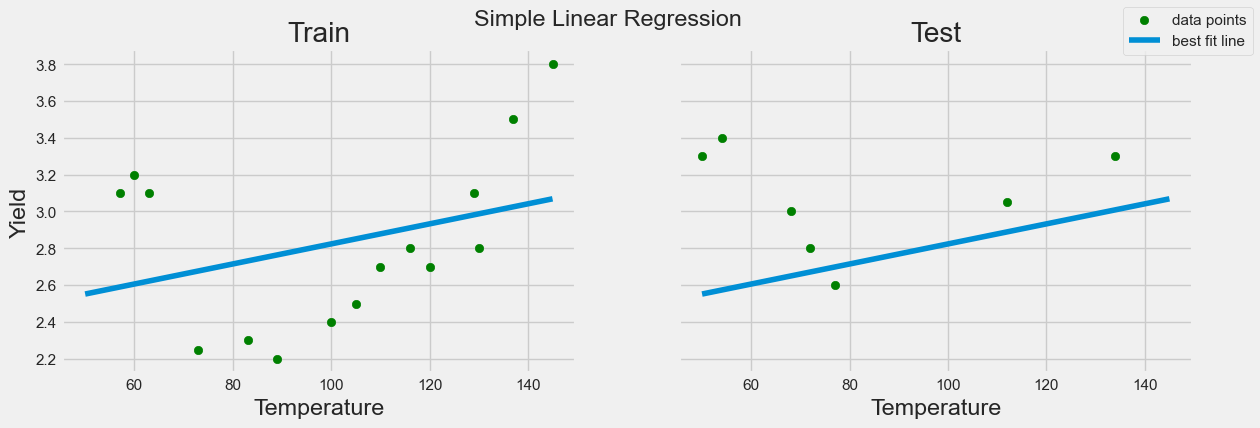

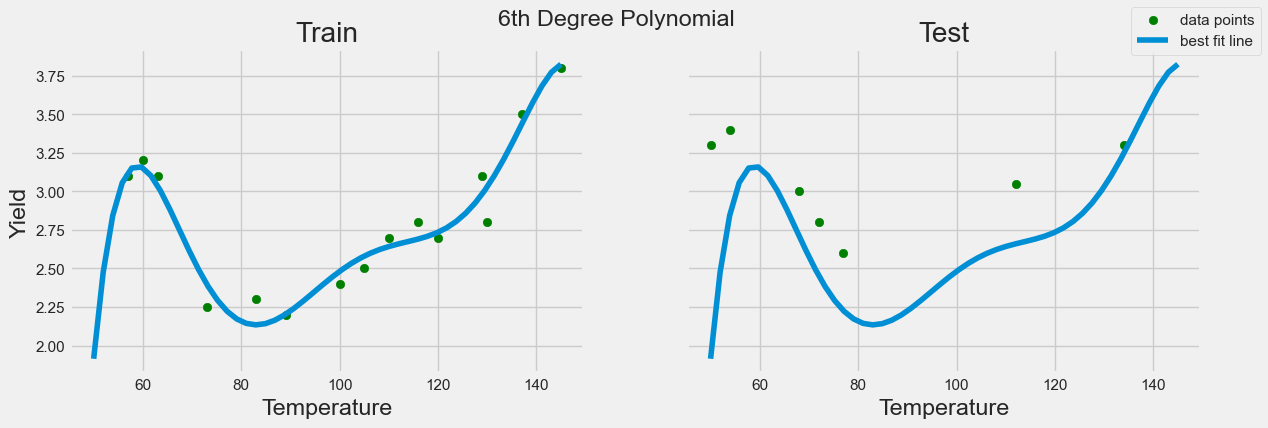

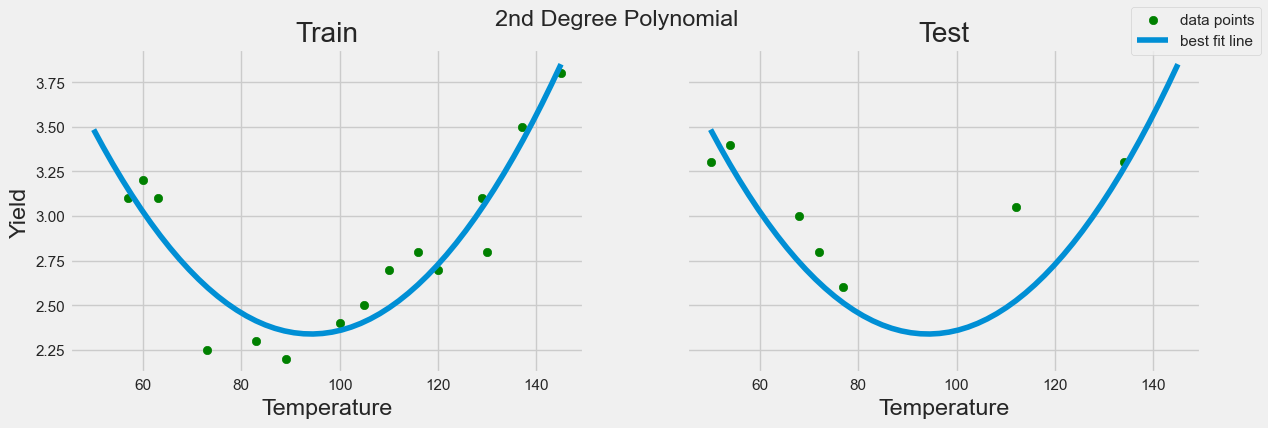


Simple Linear Regression
Train MSE: 0.18250661207533303
Test MSE:  0.2147211088265116

6th Degree Polynomial
Train MSE: 0.010446920234486885
Test MSE:  0.3871466681998806

2nd Degree Polynomial
Train MSE: 0.027868760930878957
Test MSE:  0.06124237736142958



In [348]:
from sklearn.preprocessing import PolynomialFeatures

# Load dataset
yld = pd.read_csv('yield2.csv', sep=r'\s+', index_col=0)

y = yld['Yield']
X = yld[['Temp']]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=34567)

# Simple Linear Regression
reg = LinearRegression().fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# 6th Degree Polynomial
poly = PolynomialFeatures(6)
reg_poly = LinearRegression().fit(poly.fit_transform(X_train), y_train)
y_train_pred_poly = reg_poly.predict(poly.transform(X_train))
y_test_pred_poly = reg_poly.predict(poly.transform(X_test))

# 2nd Degree Polynomial
poly_2 = PolynomialFeatures(2)
reg_poly_2 = LinearRegression().fit(poly_2.fit_transform(X_train), y_train)
y_train_pred_poly_2 = reg_poly_2.predict(poly_2.transform(X_train))
y_test_pred_poly_2 = reg_poly_2.predict(poly_2.transform(X_test))

# Define X_linspace
X_linspace = pd.DataFrame(np.linspace(X['Temp'].min(), X['Temp'].max(), 50), columns=['Temp'])

# Visualize Results
def plot_results(X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, title):
    fig, axes = plt.subplots(ncols=2, figsize=(13, 4), sharey=True)
    
    axes[0].scatter(X_train, y_train, color='green', label="data points")
    axes[0].plot(X_linspace, y_train_pred, label="best fit line")
    axes[0].set_xlabel('Temperature')
    axes[0].set_ylabel('Yield')
    axes[0].set_title('Train')
    
    axes[1].scatter(X_test, y_test, color='green')
    axes[1].plot(X_linspace, y_test_pred)
    axes[1].set_xlabel('Temperature')
    axes[1].set_title('Test')
    
    fig.legend()
    fig.suptitle(title)
    plt.show()

plot_results(X_train, y_train, X_test, y_test, reg.predict(X_linspace), reg.predict(X_linspace), 'Simple Linear Regression')
plot_results(X_train, y_train, X_test, y_test, reg_poly.predict(poly.transform(X_linspace)), reg_poly.predict(poly.transform(X_linspace)), '6th Degree Polynomial')
plot_results(X_train, y_train, X_test, y_test, reg_poly_2.predict(poly_2.transform(X_linspace)), reg_poly_2.predict(poly_2.transform(X_linspace)), '2nd Degree Polynomial')

# Print MSE scores
print(f"""
Simple Linear Regression
Train MSE: {mean_squared_error(y_train, y_train_pred)}
Test MSE:  {mean_squared_error(y_test, y_test_pred)}

6th Degree Polynomial
Train MSE: {mean_squared_error(y_train, y_train_pred_poly)}
Test MSE:  {mean_squared_error(y_test, y_test_pred_poly)}

2nd Degree Polynomial
Train MSE: {mean_squared_error(y_train, y_train_pred_poly_2)}
Test MSE:  {mean_squared_error(y_test, y_test_pred_poly_2)}
""")


# Bias-Variance Trade-Off Results Interpretation

## **Simple Linear Regression**

- **Train MSE**: 0.183  
- **Test MSE**: 0.215  

### **High Bias Indicator**:
- The high MSE for both training and testing sets suggests the model is too simplistic.
- It fails to capture the true underlying relationship in the data, resulting in consistently large errors.

### **Conclusion**:
- The model **underfits** the data, exhibiting **high bias**.

## **6th Degree Polynomial**

- **Train MSE**: 0.010  
- **Test MSE**: 0.387  

### **High Variance Indicator**:
- The extremely low train MSE indicates the model fits the training data almost perfectly.
- The much higher test MSE shows poor performance on new data.
- The large discrepancy suggests the model is overly complex and captures noise, failing to generalize well.

### **Conclusion**:
- The model **overfits** the data, exhibiting **high variance**.

## **2nd Degree Polynomial**

- **Train MSE**: 0.028  
- **Test MSE**: 0.061  

### **Balanced Bias and Variance**:
- Both train and test MSE are reasonably low and close to each other.
- This indicates a good balance where the model captures underlying patterns without fitting noise.

### **Conclusion**:
- The model strikes a **good balance** between bias and variance, generalizing well to new data.
